<a href="https://colab.research.google.com/github/hpsuresh12345/Python-code/blob/master/SentimentAnalysis_Assignment2_02Sep2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [0]:
train  = pd.read_csv('train_tweet_310819.csv')
test = pd.read_csv('test_tweets_310819.csv')

In [3]:
train.head()

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

In [56]:
train.describe()

id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000

In [58]:
test.head()

id                                              tweet  label
0  31963  #studiolife #aislife #requires #passion #dedic...      0
1  31964   @user #white #supremacists want everyone to s...      0
2  31965  safe ways to heal your #acne!!    #altwaystohe...      0
3  31966  is the hp and the cursed child book up for res...      0
4  31967    3rd #bihday to my amazing, hilarious #nephew...      0

In [57]:
test.describe()

id         label
count  17197.000000  17197.000000
mean   40561.000000      0.038960
std     4964.490625      0.193506
min    31963.000000      0.000000
25%    36262.000000      0.000000
50%    40561.000000      0.000000
75%    44860.000000      0.000000
max    49159.000000      1.000000

Text PreProcessing and Cleaning

Data Inspection

check out a few non racist/sexist tweets

In [4]:
train[train['label'] == 0].head(10)

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation
5   6      0  [2/2] huge fan fare and big talking before the...
6   7      0   @user camping tomorrow @user @user @user @use...
7   8      0  the next school year is the year for exams.ð...
8   9      0  we won!!! love the land!!! #allin #cavs #champ...
9  10      0   @user @user welcome here !  i'm   it's so #gr...

check out a few racist/sexist tweets

In [5]:
train[train['label'] == 1].head(10)

id  label                                              tweet
13    14      1  @user #cnn calls #michigan middle school 'buil...
14    15      1  no comment!  in #australia   #opkillingbay #se...
17    18      1                             retweet if you agree! 
23    24      1    @user @user lumpy says i am a . prove it lumpy.
34    35      1  it's unbelievable that in the 21st century we'...
56    57      1            @user lets fight against  #love #peace 
68    69      1  ð©the white establishment can't have blk fol...
77    78      1  @user hey, white people: you can call people '...
82    83      1  how the #altright uses  &amp; insecurity to lu...
111  112      1  @user i'm not interested in a #linguistics tha...

dimensions of the train and test dataset.

In [6]:
train.shape, test.shape

((31962, 3), (17197, 2))

In the train dataset, we have 2,242 (~7%) tweets labeled as racist or sexist, and 29,720 (~93%) tweets labeled as non racist/sexist. So, it is an imbalanced classification challenge.

In [7]:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

distribution of length of the tweets, in terms of words, in both train and test data.

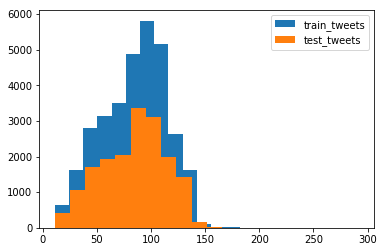

In [8]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()

plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label="test_tweets")
plt.legend()
plt.show()

Data Cleaning

In [9]:
combi = train.append(test, ignore_index=True)
combi.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(49159, 3)

Given below is a user-defined function to remove unwanted text patterns from the tweets.

In [0]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

1. Removing Twitter Handles (@user)

In [11]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*") 
combi.head()

id  ...                                         tidy_tweet
0   1  ...    when a father is dysfunctional and is so sel...
1   2  ...    thanks for #lyft credit i can't use cause th...
2   3  ...                                bihday your majesty
3   4  ...  #model   i love u take with u all the time in ...
4   5  ...             factsguide: society now    #motivation

[5 rows x 4 columns]

2. Removing Punctuations, Numbers, and Special Characters

In [12]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi.head(10)

id  ...                                         tidy_tweet
0   1  ...    when a father is dysfunctional and is so sel...
1   2  ...    thanks for #lyft credit i can t use cause th...
2   3  ...                                bihday your majesty
3   4  ...  #model   i love u take with u all the time in ...
4   5  ...             factsguide  society now    #motivation
5   6  ...        huge fan fare and big talking before the...
6   7  ...                   camping tomorrow        danny   
7   8  ...  the next school year is the year for exams    ...
8   9  ...  we won    love the land    #allin #cavs #champ...
9  10  ...              welcome here    i m   it s so #gr    

[10 rows x 4 columns]

3. Removing Short Words



In [0]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))


In [14]:
combi.head()

id  ...                                         tidy_tweet
0   1  ...  when father dysfunctional selfish drags kids i...
1   2  ...  thanks #lyft credit cause they offer wheelchai...
2   3  ...                                bihday your majesty
3   4  ...                         #model love take with time
4   5  ...                     factsguide society #motivation

[5 rows x 4 columns]

4. Text Normalization

In [0]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

In [16]:
tokenized_tweet.head()


0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [0]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [0]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
combi['tidy_tweet'] = tokenized_tweet

WordCloud

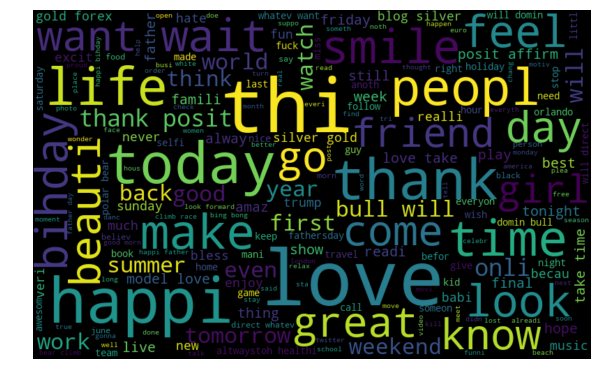

In [19]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Words in non racist/sexist tweets

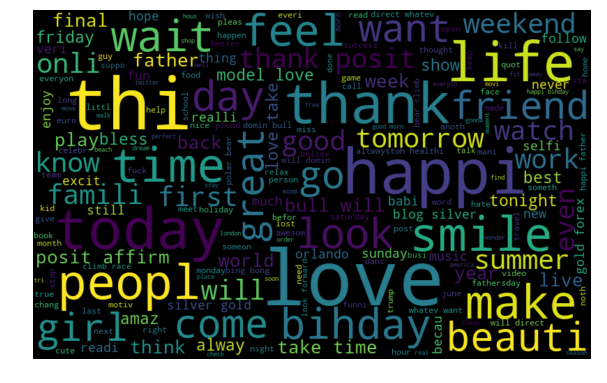

In [20]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Racist/Sexist Tweets

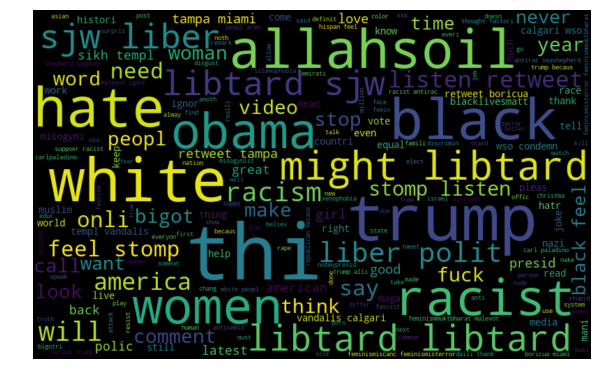

In [21]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Understanding the impact of Hashtags on tweets sentiment

In [0]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [0]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

Non-Racist/Sexist Tweets

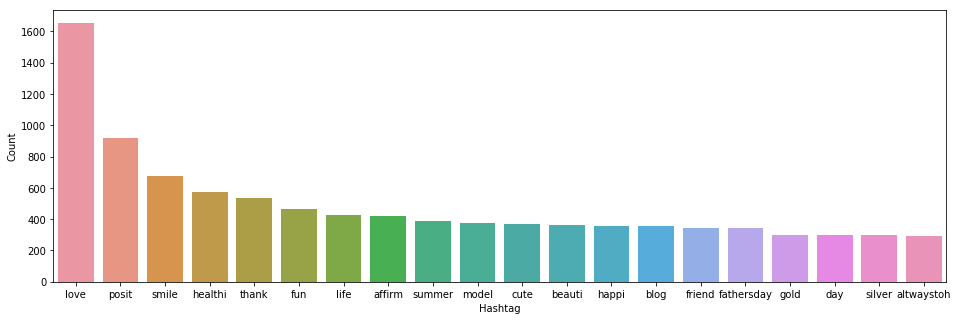

In [24]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

Racist/Sexist Tweets

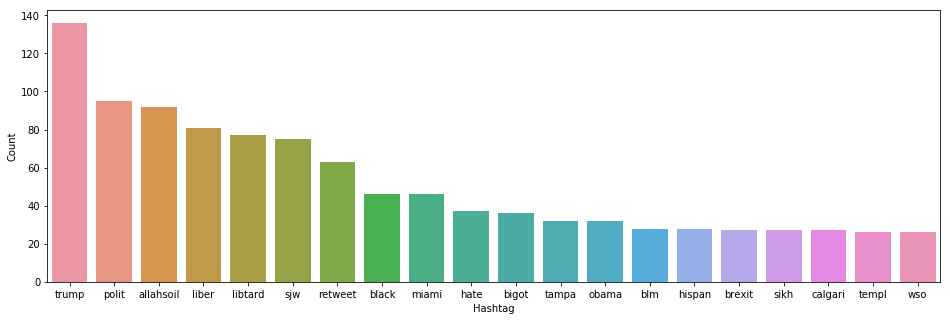

In [25]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

Extracting Features from Cleaned Tweets

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim


Bag-of-Words Features

In [27]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(49159, 1000)

TF-IDF Features

In [28]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(49159, 1000)

Word Embeddings

In [29]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(6510028, 7536020)

In [30]:
model_w2v.wv.most_similar(positive="dinner")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('#avocado', 0.549025297164917),
 ('spaghetti', 0.54747074842453),
 ('#bihdaydinn', 0.5405250787734985),
 ('#biall', 0.5399234890937805),
 ('fav', 0.5386112332344055),
 ('cookout', 0.5368983745574951),
 ('gown', 0.5332047343254089),
 ('spinach', 0.5325624346733093),
 ('#cellar', 0.53162682056427),
 ('noodl', 0.5312787294387817)]

In [31]:
model_w2v.wv.most_similar(positive="trump")


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('donald', 0.5559486150741577),
 ('phoni', 0.5299792289733887),
 ('unstabl', 0.5263315439224243),
 ('hillari', 0.52476567029953),
 ('#delegaterevolt', 0.5244029760360718),
 ('melo', 0.52186518907547),
 ('unfit', 0.5208601355552673),
 ('nomine', 0.5181540250778198),
 ('jibe', 0.5106672048568726),
 ('potu', 0.510433554649353)]

In [32]:
model_w2v['food']


array([-0.18334903,  0.04278243, -0.12261885,  0.39230502,  0.5744977 ,
       -0.8698771 ,  0.37173066, -1.002     , -0.26965034,  0.8469452 ,
       -0.12792778,  0.31098926, -0.6068526 , -0.05716884,  0.05229763,
       -0.17397633,  0.22209804, -0.12122853, -0.25926855, -0.22349225,
       -0.2052665 ,  0.11930105, -0.62320936,  0.2510186 ,  0.3799104 ,
       -0.9068616 , -0.42431417,  0.15245973,  0.0249671 ,  0.72017175,
       -0.0219386 ,  0.24039587, -0.12784386,  0.6081018 , -0.07897923,
       -0.17433137,  0.5481404 , -0.4484867 , -0.82718384, -0.13615684,
        0.61702555, -0.04238774,  0.52824104, -1.0681062 , -0.26669404,
        0.5915642 ,  0.51874566,  0.50725496, -0.52814174,  0.50451577,
       -0.38374558,  0.5362869 , -0.5815583 , -0.27979958, -0.23492643,
       -0.1599803 ,  0.3378605 ,  0.5481216 ,  0.69682187,  0.7988558 ,
        0.17242655, -0.02621233, -0.15379162,  0.19160886,  0.46384612,
        0.32159206,  0.06894082,  0.36609504,  0.4978936 ,  0.11

In [33]:
len(model_w2v['food']) #The length of the vector is 200


200

Preparing Vectors for Tweets

In [0]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

# Preparing word2vec feature set

In [35]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(49159, 200)

Doc2Vec Embedding

In [0]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [0]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

In [0]:
labeled_tweets = add_label(tokenized_tweet) # label all the tweet

In [39]:
labeled_tweets[:6]

[LabeledSentence(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 LabeledSentence(words=['factsguid', 'societi', '#motiv'], tags=['tweet_4']),
 LabeledSentence(words=['huge', 'fare', 'talk', 'befor', 'they', 'leav', 'chao', 'disput', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5'])]

train a doc2vec model

In [40]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model 
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors
                                  size=200, # no. of desired features
                                  window=5, # width of the context window
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 2.
                                  workers=3, # no. of cores
                                  alpha=0.1, # learning rate
                                  seed = 23)

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 49159/49159 [00:00<00:00, 1643113.90it/s]


In [0]:
model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)

Preparing doc2vec Feature Set

In [42]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))
    
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(49159, 200)

Model Building

Logistic Regression,XGboost classifier, 
Naive Bayes,
Kmeans



```
# This is formatted as code
```

1.Logistic Regression using bag of words

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [0]:
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [45]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5307820299500832

*Predict* Test and create output file

In [0]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

2. XGBoost

In [0]:
from xgboost import XGBClassifier


Bag-of-Words Features

In [48]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.5130687318489837

In [0]:
test_pred = xgb_model.predict(test_bow)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('sub_xgb_bow.csv', index=False)

3.NaiveBayesClassifier


In [50]:
from sklearn.naive_bayes import MultinomialNB
clf= MultinomialNB()
clf.fit(xtrain_bow, ytrain)

score = clf.score(xvalid_bow, yvalid)
score

0.9331525706538742

In [51]:
y_pred_class = clf.predict(xvalid_bow)

# print the confusion matrix

from sklearn import metrics
metrics.confusion_matrix(yvalid, y_pred_class)

array([[8612,  293],
       [ 348,  336]])

4. kmeans

In [61]:
from sklearn.cluster import MiniBatchKMeans

num_clusters = 10
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters, init='k-means++', n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
kmeans = kmeans_model.fit(xtrain_bow)
kmeans_clusters = kmeans.predict(xtrain_bow)
kmeans_distances = kmeans.transform(xtrain_bow)
sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
print(kmeans_clusters)
print(kmeans)

for i in range(num_clusters):
    print("Cluster %d:" % i)
    for j in sorted_centroids[i, :5]:
        print(' %s' % [j])
    print()
    
prediction = kmeans.predict(xvalid_bow)
prediction

metrics.confusion_matrix(yvalid, prediction)


[0 0 0 ... 0 0 0]
MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
                init_size=1000, max_iter=1000, max_no_improvement=10,
                n_clusters=10, n_init=1, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=False)
Cluster 0:
 [389]
 [461]
 [891]
 [498]
 [529]

Cluster 1:
 [744]
 [389]
 [139]
 [166]
 [298]

Cluster 2:
 [881]
 [498]
 [518]
 [963]
 [529]

Cluster 3:
 [879]
 [662]
 [518]
 [364]
 [324]

Cluster 4:
 [518]
 [888]
 [557]
 [494]
 [389]

Cluster 5:
 [662]
 [12]
 [374]
 [389]
 [691]

Cluster 6:
 [302]
 [303]
 [202]
 [389]
 [210]

Cluster 7:
 [630]
 [533]
 [728]
 [615]
 [116]

Cluster 8:
 [891]
 [186]
 [959]
 [342]
 [353]

Cluster 9:
 [494]
 [794]
 [336]
 [505]
 [926]



array([[6584,    5,  710,  134,  807,  165,  216,   37,   12,  235],
       [ 598,    0,   67,    0,    9,    1,    2,    3,    0,    4],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0]])